In [1]:
!python --version

Python 3.11.9


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
!mkdir dataset

In [4]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv 

--2024-10-09 23:31:57--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops.csv’

laptops.csv         100%[===================>] 291.58K  --.-KB/s    in 0.08s   

2024-10-09 23:31:57 (3.78 MB/s) - ‘laptops.csv’ saved [298573/298573]



In [5]:
!mv laptops.csv dataset

In [6]:
!ls dataset

laptops.csv


In [7]:
df = pd.read_csv('dataset/laptops.csv')
len(df)

2160

In [8]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [9]:
def preparing_dataset(df):
    df.columns = df.columns.str.lower().str.replace(" ", "_")
    
    string_columns = list(df.dtypes[df.dtypes == 'object'].index)
    for col in string_columns:
        df[col] = df[col].str.lower().str.replace(' ', '_')
    return df

In [10]:
df = preparing_dataset(df)
df.tail()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
2155,razer_blade_17_fhd_360hz_intel_core_i7-11800h/...,refurbished,razer,blade,intel_core_i7,16,1000,ssd,rtx_3060,17.3,no,2699.99
2156,razer_blade_17_fhd_360hz_intel_core_i7-11800h/...,refurbished,razer,blade,intel_core_i7,16,1000,ssd,rtx_3070,17.3,no,2899.99
2157,razer_blade_17_fhd_360hz_intel_core_i7-11800h/...,refurbished,razer,blade,intel_core_i7,32,1000,ssd,rtx_3080,17.3,no,3399.99
2158,razer_book_13_intel_evo_core_i7-1165g7/16gb/1t...,refurbished,razer,book,intel_evo_core_i7,16,1000,ssd,NaN,13.4,yes,1899.99
2159,razer_book_fhd+_intel_evo_core_i7-1165g7/16gb/...,refurbished,razer,book,intel_evo_core_i7,16,256,ssd,NaN,13.4,yes,1699.99


In [11]:
df.dtypes

laptop           object
status           object
brand            object
model            object
cpu              object
ram               int64
storage           int64
storage_type     object
gpu              object
screen          float64
touch            object
final_price     float64
dtype: object

### EDA

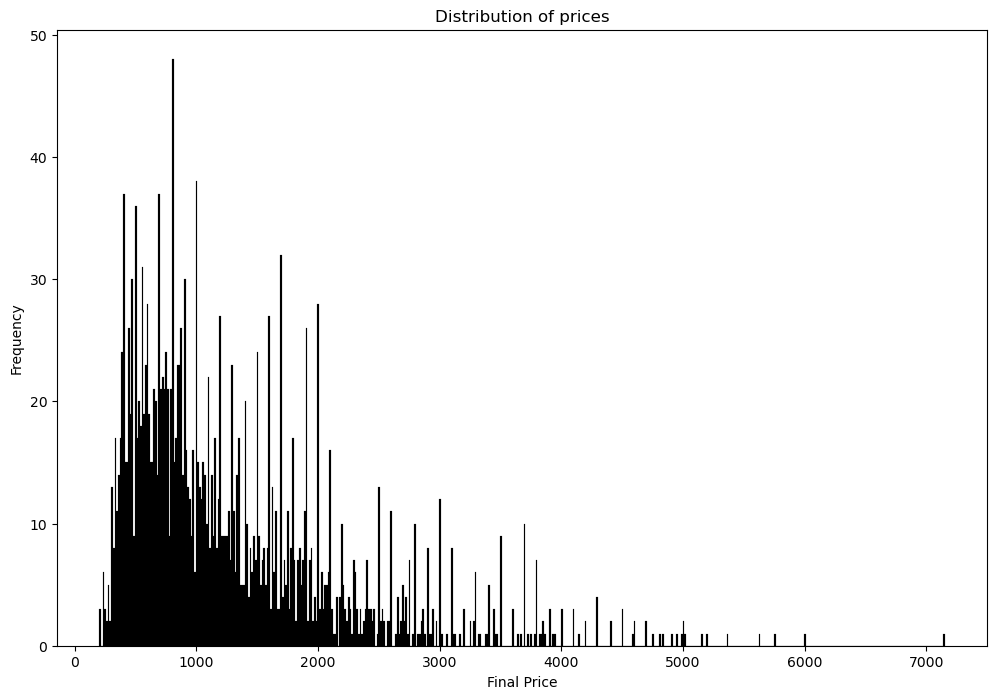

In [12]:
plt.figure(figsize=(12, 8))

sns.histplot(df.final_price, bins=500, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Final Price')
plt.title('Distribution of prices')

plt.show()

In [13]:
columns_base = ['ram', 'storage', 'screen', 'final_price']
columns_base

['ram', 'storage', 'screen', 'final_price']

In [14]:
final_price_log = np.log1p(df.final_price)

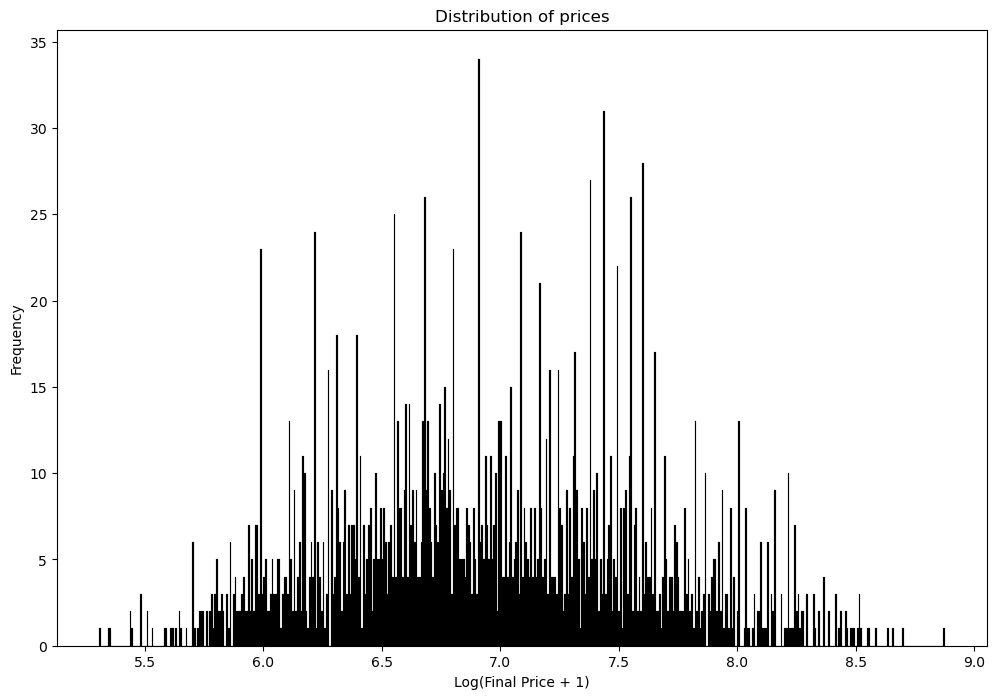

In [15]:
plt.figure(figsize=(12, 8))

sns.histplot(final_price_log, bins=500, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Final Price + 1)')
plt.title('Distribution of prices')

plt.show()

## Question 1

In [16]:
df[columns_base].isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

## Question 2

In [17]:
df['ram'].median()

16.0

In [18]:
df['ram'].quantile(0.5)

16.0

In [19]:
df['ram'].describe()

count    2160.000000
mean       15.413889
std         9.867815
min         4.000000
25%         8.000000
50%        16.000000
75%        16.000000
max       128.000000
Name: ram, dtype: float64

In [20]:
np.random.seed(42)
n = len(df)
n

2160

In [21]:
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

In [22]:
idx = np.arange(n)
np.random.shuffle(idx)
idx

array([2079,  668, 2073, ..., 1130, 1294,  860])

In [23]:
df_shuffled = df.iloc[idx]
df_shuffled.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
2079,msi_modern_15_a11sbu-620xes_intel_core_i7-1165...,refurbished,msi,modern,intel_core_i7,32,1000,ssd,mx_450,15.6,no,1123.29
668,thomson_neo_white_intel_celeron_n4020/4gb/64gb...,new,thomson,neo,intel_celeron,4,64,emmc,NaN,14.1,no,201.05
2073,msi_modern_14_b11sb-420xes_intel_core_i7-1165g...,refurbished,msi,modern,intel_core_i7,32,1000,ssd,mx_450,14.0,no,997.74
1113,asus_zenbook_13_oled_ux325ea_intel_evo_core_i7...,new,asus,zenbook,intel_evo_core_i7,16,512,ssd,NaN,13.3,no,1016.00
788,acer_predator_triton_500_se_pt516-51s-75k6_int...,new,acer,predator,intel_core_i7,32,1000,ssd,rtx_3080,16.0,no,2739.00


In [24]:
df_shuffled.reset_index(inplace=True)
df_shuffled.head()

,index,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,2079,msi_modern_15_a11sbu-620xes_intel_core_i7-1165...,refurbished,msi,modern,intel_core_i7,32,1000,ssd,mx_450,15.6,no,1123.29
1,668,thomson_neo_white_intel_celeron_n4020/4gb/64gb...,new,thomson,neo,intel_celeron,4,64,emmc,NaN,14.1,no,201.05
2,2073,msi_modern_14_b11sb-420xes_intel_core_i7-1165g...,refurbished,msi,modern,intel_core_i7,32,1000,ssd,mx_450,14.0,no,997.74
3,1113,asus_zenbook_13_oled_ux325ea_intel_evo_core_i7...,new,asus,zenbook,intel_evo_core_i7,16,512,ssd,NaN,13.3,no,1016.00
4,788,acer_predator_triton_500_se_pt516-51s-75k6_int...,new,acer,predator,intel_core_i7,32,1000,ssd,rtx_3080,16.0,no,2739.00


In [25]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [26]:
y_train_orig = df_train.final_price.values
y_val_orig = df_val.final_price.values
y_test_orig = df_test.final_price.values

y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

In [27]:
df_train.drop(columns=['final_price'], inplace=True)
df_val.drop(columns=['final_price'], inplace=True)
df_test.drop(columns=['final_price'], inplace=True)

## Question 3

In [28]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [29]:
def prepare_X_fillna(df, features, column_fill, value_fill):
    df_num = df[features]
    if column_fill in features:
        df_num = df_num.fillna({column_fill: value_fill})
        X = df_num.values
    else:
        X = None
    return X

In [30]:
features = ['ram', 'storage', 'screen']
features

['ram', 'storage', 'screen']

In [31]:
def rmse(y, y_pred):
    mse = ((y_pred - y) ** 2).mean()
    return np.sqrt(mse)

### fillna column screen = 0

In [32]:
X_train = prepare_X_fillna(df_train, features, 'screen', 0)
w_0, w = train_linear_regression(X_train, y_train)
w_0, w

(6.727163706112481, array([ 0.02630589,  0.00066041, -0.03651909]))

In [33]:
X_val = prepare_X_fillna(df_val, features, 'screen', 0)
y_pred = w_0 + X_val.dot(w)
score = rmse(y_val, y_pred)
round(score, 2)

0.43

### fillna column screen = median

In [34]:
media_screen = df_train.screen.mean()
media_screen

15.163534416086618

In [35]:
X_train = prepare_X_fillna(df_train, features, 'screen', media_screen)
w_0, w = train_linear_regression(X_train, y_train)
w_0, w

(6.855566544134296, array([ 0.02650252,  0.00066643, -0.04534341]))

In [36]:
X_val = prepare_X_fillna(df_val, features, 'screen', media_screen)
y_pred = w_0 + X_val.dot(w)
score = rmse(y_val, y_pred)
round(score, 2)

0.43

## Question 4

In [37]:
def train_linear_regression_reg(X, y, r=0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX += reg
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [38]:
list_r = [0, 0.01, 0.1, 1, 5, 10, 100]

In [39]:
X_train = prepare_X_fillna(df_train, features, 'screen', 0)
X_val = prepare_X_fillna(df_val, features, 'screen', 0)

for value_r in list_r:
    w_0, w = train_linear_regression_reg(X_train, y_train, value_r)
    y_pred = w_0 + X_val.dot(w)
    score = rmse(y_val, y_pred)

    print(f'alpha:{value_r:5<} \trmse:{round(score, 2):5<} \tw_0:{w_0:8<}')
    

alpha:0 	rmse:0.43 	w_0:6.727163706112481
alpha:0.01 	rmse:0.43 	w_0:6.721004333260219
alpha:0.1 	rmse:0.43 	w_0:6.666075503828108
alpha:1 	rmse:0.43 	w_0:6.162616499461252
alpha:5 	rmse:0.46 	w_0:4.616086176497313
alpha:10 	rmse:0.51 	w_0:3.5167547207936254
alpha:100 	rmse:0.67 	w_0:0.6849263362660136


## Question 5

In [40]:
def spli_data(dataFrame, target, test_per=0.2, val_per=0.2, seed=0, standardize=True):
    np.random.seed(seed)
    n = dataFrame.shape[0]

    n_test = int(val_per * n)
    n_val = int(test_per * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = dataFrame.iloc[idx]
    df_shuffled.reset_index(inplace=True)

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    if standardize:
        y_train = np.log1p(df_train[target].values)
        y_val = np.log1p(df_val[target].values)
        y_test = np.log1p(df_test[target].values)
    else:
        y_train = df_train[target].values
        y_val = df_val[target].values
        y_test = df_test[target].values

    df_train.drop(columns=[target], inplace=True)
    df_val.drop(columns=[target], inplace=True)
    df_test.drop(columns=[target], inplace=True)
    
    return {'train': {'X': df_train, 'y': y_train}, 'val': {'X': df_val, 'y': y_val}, 'test': {'X': df_test, 'y': y_test}}

In [41]:
def train_predict_model(dict_train_valid_test, features, alpha=None):

    X_train = prepare_X_fillna(dict_train_valid_test['train']['X'], features, 'screen', 0)

    if alpha:
        w_0, w = train_linear_regression_reg(X_train, dict_train_valid_test['train']['y'], alpha)
    else:
        w_0, w = train_linear_regression(X_train, dict_train_valid_test['train']['y'])
        
    X_val = prepare_X_fillna(dict_train_valid_test['val']['X'], features, 'screen', 0)

    return w_0 + X_val.dot(w)

In [42]:
list_semilla = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
features = ['ram', 'storage', 'screen']
list_rmse = list()

for semilla in list_semilla:
    dict_train_valid_test = spli_data(df, 'final_price', test_per=0.2, val_per=0.2, seed=semilla, standardize=False)
    y_pred = train_predict_model(dict_train_valid_test, features)
    
    score = rmse(dict_train_valid_test['val']['y'], y_pred)
    list_rmse.append(score)

    print(f'semilla:{semilla:3<} \trmse:{round(score, 5):5<} \tw_0:{w_0:8<}')

semilla:0 	rmse:565.45209 	w_0:0.6849263362660136
semilla:1 	rmse:636.79854 	w_0:0.6849263362660136
semilla:2 	rmse:588.95587 	w_0:0.6849263362660136
semilla:3 	rmse:597.81489 	w_0:0.6849263362660136
semilla:4 	rmse:571.96279 	w_0:0.6849263362660136
semilla:5 	rmse:573.23833 	w_0:0.6849263362660136
semilla:6 	rmse:647.34383 	w_0:0.6849263362660136
semilla:7 	rmse:550.43982 	w_0:0.6849263362660136
semilla:8 	rmse:587.3335 	w_0:0.6849263362660136
semilla:9 	rmse:576.10179 	w_0:0.6849263362660136


In [43]:
np_rmse = np.array(list_rmse)
std = np_rmse.std()

print(f'rmse std:{round(std, 3):8<}')

rmse std:29.176


## Question 6

In [44]:
def spli_data(dataFrame, target, test_per=0.2, val_per=0.2, seed=0, standardize=True, join_train_tes=False):
    np.random.seed(seed)
    n = dataFrame.shape[0]

    n_test = int(val_per * n)
    n_val = int(test_per * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = dataFrame.iloc[idx]
    df_shuffled.reset_index(inplace=True)

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    if standardize:
        y_train = np.log1p(df_train[target].values)
        y_val = np.log1p(df_val[target].values)
        y_test = np.log1p(df_test[target].values)
    else:
        y_train = df_train[target].values
        y_val = df_val[target].values
        y_test = df_test[target].values

    df_train.drop(columns=[target], inplace=True)
    df_val.drop(columns=[target], inplace=True)
    df_test.drop(columns=[target], inplace=True)

    if join_train_tes:
        df_train_full = pd.concat([df_train, df_val])
        y_train_full = np.concatenate((y_train, y_val))

        return {'train_full': {'X': df_train_full, 'y': y_train_full}, 'test': {'X': df_test, 'y': y_test}}
    else:
        return {'train': {'X': df_train, 'y': y_train}, 'val': {'X': df_val, 'y': y_val}, 'test': {'X': df_test, 'y': y_test}}

In [45]:
def train_predict_model(dict_train_valid_test, features, alpha=None, use_train_full=False):

    if use_train_full:
        y_train = dict_train_valid_test['train_full']['y']
        X_train = prepare_X_fillna(dict_train_valid_test['train_full']['X'], features, 'screen', 0)
        X_val = prepare_X_fillna(dict_train_valid_test['test']['X'], features, 'screen', 0)
    else:
        y_train = dict_train_valid_test['train']['y']
        X_train = prepare_X_fillna(dict_train_valid_test['train']['X'], features, 'screen', 0)
        X_val = prepare_X_fillna(dict_train_valid_test['val']['X'], features, 'screen', 0)

    if alpha:
        w_0, w = train_linear_regression_reg(X_train, y_train, alpha)
    else:
        w_0, w = train_linear_regression(X_train, y_train)

    return w_0 + X_val.dot(w)

In [46]:
list_semilla = [9]
features = ['ram', 'storage', 'screen']
alpha = 0.001

for semilla in list_semilla:
    dict_train_valid_test = spli_data(df, 'final_price', test_per=0.2, val_per=0.2, seed=semilla, standardize=False, join_train_tes=True)
    y_pred = train_predict_model(dict_train_valid_test, features, alpha=alpha, use_train_full=True)
    
    score = rmse(dict_train_valid_test['test']['y'], y_pred)
    list_rmse.append(score)

    print(f'semilla:{semilla:3<} \trmse:{round(score, 5):5<} \tw_0:{w_0:8<}')



semilla:9 	rmse:608.60998 	w_0:0.6849263362660136
